In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("AAPL.csv")

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data["DateTime"] = pd.to_datetime(data["Date"],format='%d-%m-%Y')
data['Year'] = data['DateTime'].dt.year
# data['Month_num'] = data['DateTime'].dt.month
# data['Day_num'] = data['DateTime'].dt.day_of_week
data['Month'] = data['DateTime'].dt.month_name()
data['Day'] = data['DateTime'].dt.day_name()
# data['quarter'] = data['DateTime'].dt.to_period('Q')
# data['Quarter'] = pd.PeriodIndex(data['DateTime'], freq='Q')
data['Quarter'] = data['DateTime'].dt.year.astype('str')+'Q'+data["DateTime"].dt.quarter.astype('str')
data['Year_Month'] = data['DateTime'].apply(lambda x: x.strftime('%Y-%B'))
data['Year_Week'] = data['DateTime'].dt.strftime('%Y-%U')

In [8]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,DateTime,Year,Month,Day,Quarter,Year_Month,Year_Week
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,2019-12-23,2019,December,Monday,2019Q4,2019-December,2019-51
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,2019-12-24,2019,December,Tuesday,2019Q4,2019-December,2019-51
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,2019-12-26,2019,December,Thursday,2019Q4,2019-December,2019-51
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,2019-12-27,2019,December,Friday,2019Q4,2019-December,2019-51
2010,30-12-2019,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,2019-12-30,2019,December,Monday,2019Q4,2019-December,2019-52


In [9]:
data["Date_Index"] = data["Date"]
data.set_index("Date_Index", inplace=True)

### 104 weekends
### 365-104 = 261 days 
### 8-10 public holidays
### 261-9 = 252 working days a year

In [10]:
yearly_counts = data.groupby('Year').size()
yearly_counts

Year
2012    250
2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    251
dtype: int64

In [11]:
weekday_counts = data.groupby('Day').size()
weekday_counts

Day
Friday       405
Monday       379
Thursday     405
Tuesday      411
Wednesday    411
dtype: int64

In [41]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()

start_date = data["DateTime"].min()
end_date = data["DateTime"].max()

# all_dates = pd.date_range(start=start_date, end=end_date)
# missing_dates = all_dates.difference(data["DateTime"])

holidays = cal.holidays(start=start_date, end=end_date)
missed_holidays = holidays.difference(data["DateTime"])
print('Missed Holidays:')
missed_holidays

Missed Holidays:


DatetimeIndex(['2012-01-16', '2012-02-20', '2012-05-28', '2012-07-04',
               '2012-09-03', '2012-11-22', '2012-12-25', '2013-01-01',
               '2013-01-21', '2013-02-18', '2013-05-27', '2013-07-04',
               '2013-09-02', '2013-11-28', '2013-12-25', '2014-01-01',
               '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04',
               '2014-09-01', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-03',
               '2015-09-07', '2015-11-26', '2015-12-25', '2016-01-01',
               '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04',
               '2016-09-05', '2016-11-24', '2016-12-26', '2017-01-02',
               '2017-01-16', '2017-02-20', '2017-05-29', '2017-07-04',
               '2017-09-04', '2017-11-23', '2017-12-25', '2018-01-01',
               '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04',
               '2018-09-03', '2018-11-22', '2018-12-25', '2019-01-01',
      

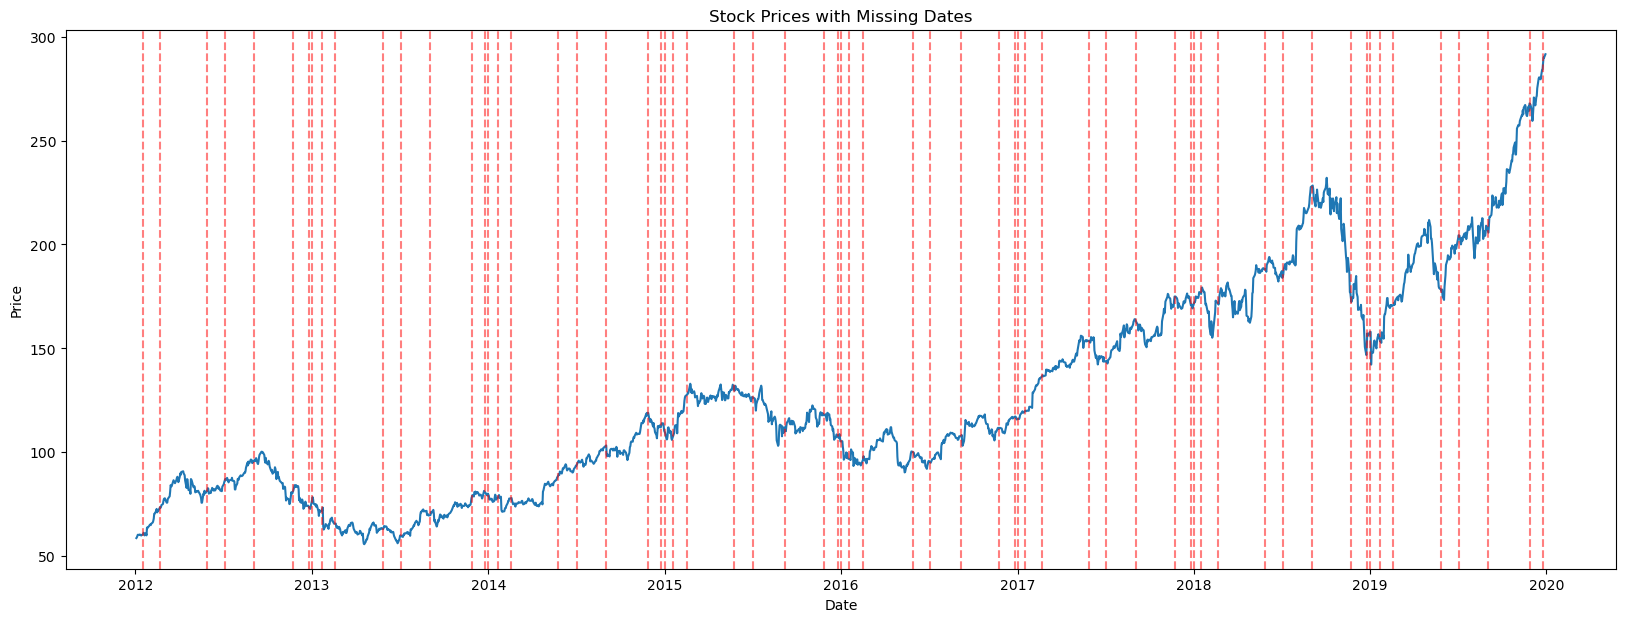

In [42]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(data["DateTime"], data['Close'])
for holiday in missed_holidays:
    ax.axvline(holiday, color='red', linestyle='--', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Stock Prices with Missing Dates')
plt.show()

trace = go.Scatter(x=data["DateTime"], y=data['Close'], mode='lines')
vlines = []
for holiday in missed_holidays:
    vlines.append(go.layout.Shape(type="line", xref="x", yref="paper", x0=holiday, y0=0, x1=holiday, y1=1, line=dict(color="red", dash="dash")))
layout = go.Layout(title='Stock Prices with Missing Dates', xaxis=dict(title='Date'), yaxis=dict(title='Price'), 
                   shapes=vlines, hovermode='x unified', xaxis_rangeslider_visible=True)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [12]:
data.corr().style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Adj Close,Volume,Year
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956,0.887463
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909,0.887817
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426,0.887947
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654,0.887795
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332,0.898586
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000,-0.690330
Year,0.887463,0.887817,0.887947,0.887795,0.898586,-0.690330,1.000000


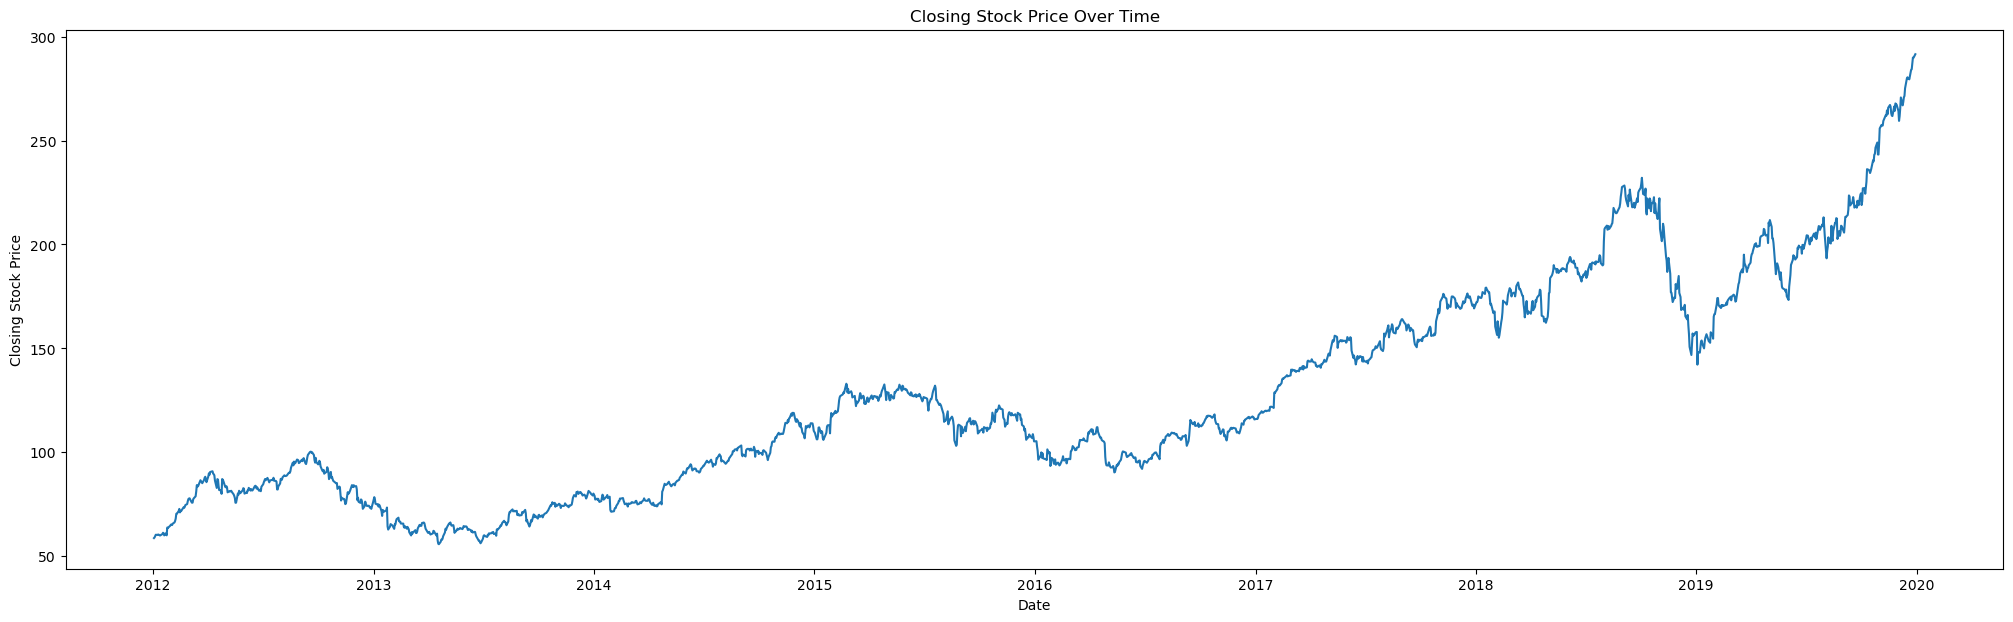

In [13]:
plt.figure(figsize=(25,7))
sns.lineplot(x='DateTime', y='Close', data=data)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

In [14]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=data['DateTime'], y=data['Close']))
# fig.layout.update(title_text='Closing Stock Price Over Time with Rangeslider', xaxis_rangeslider_visible=True)
# fig.show()

fig = px.line(x=data["DateTime"], y=data["Close"], title='Apple Closing Stock Price Over Time with Rangeslider')
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Closing Stock Price")
fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")]))
)
fig.show()

422


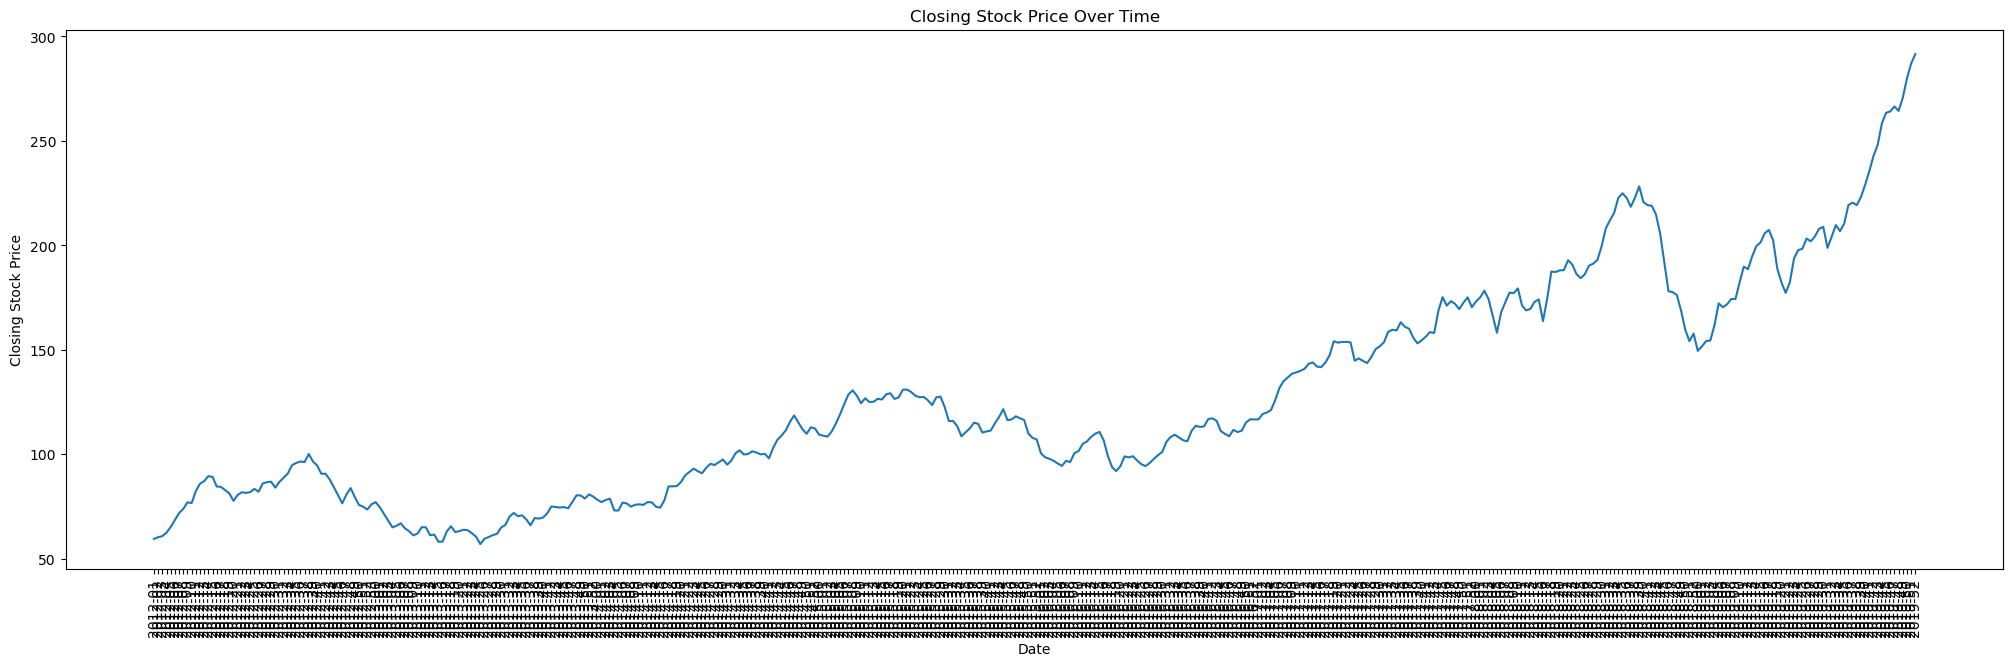

In [38]:
temp_df = data.groupby("Year_Week").mean().reset_index()

plt.figure(figsize=(25,7))
sns.lineplot(x='Year_Week', y='Close', data=temp_df[:])
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.xticks(rotation=90)
print(len(temp_df))
plt.show()

96


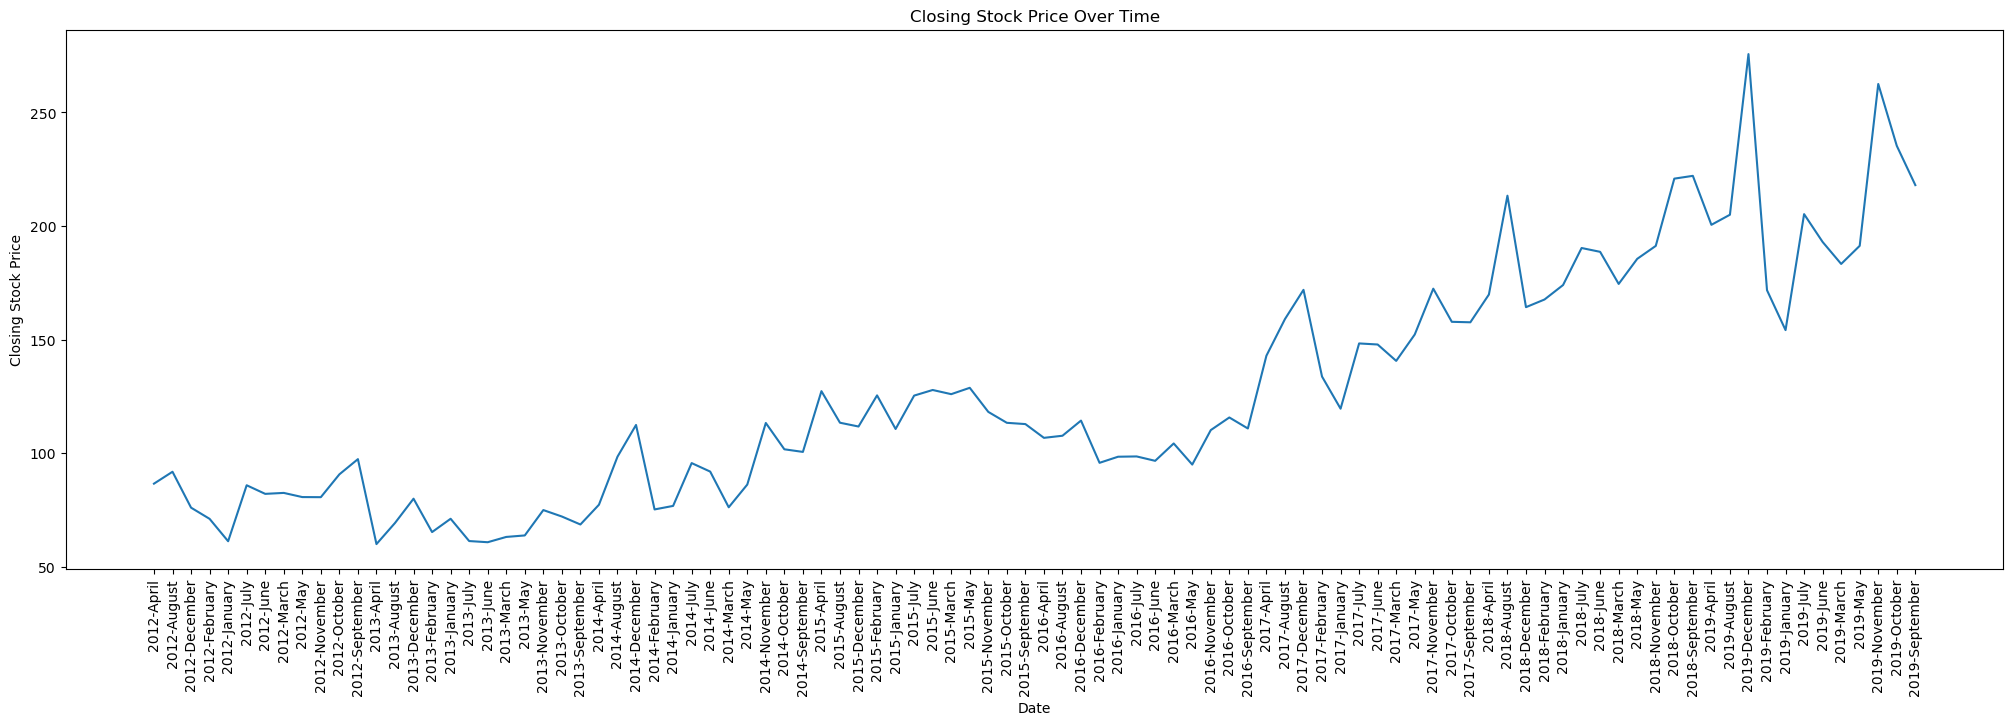

In [39]:
temp_df = data.groupby("Year_Month").mean().reset_index()

plt.figure(figsize=(25,7))
sns.lineplot(x='Year_Month', y='Close', data=temp_df[:])
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.xticks(rotation=90)
print(len(temp_df))
plt.show()

32


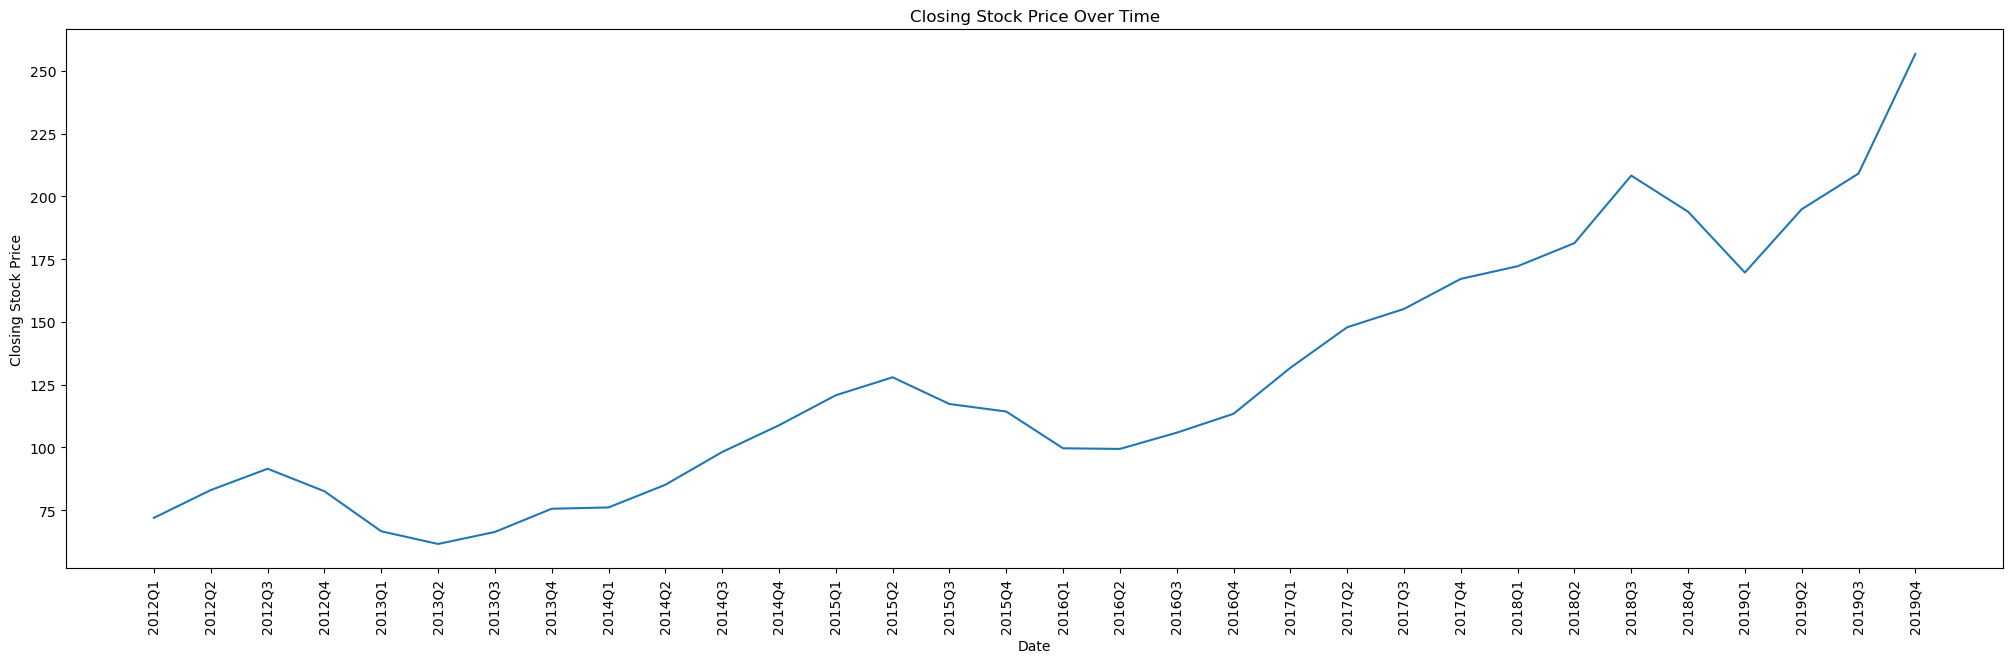

In [40]:
temp_df = data.groupby("Quarter").mean().reset_index()

plt.figure(figsize=(25,7))
sns.lineplot(x='Quarter', y='Close', data=temp_df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.xticks(rotation=90)
print(len(temp_df))
plt.show()

In [19]:
# plt.figure(figsize=(20,10))
# sns.boxplot(x='Close', y='Month', data=data)

<Axes: xlabel='Close', ylabel='Day'>

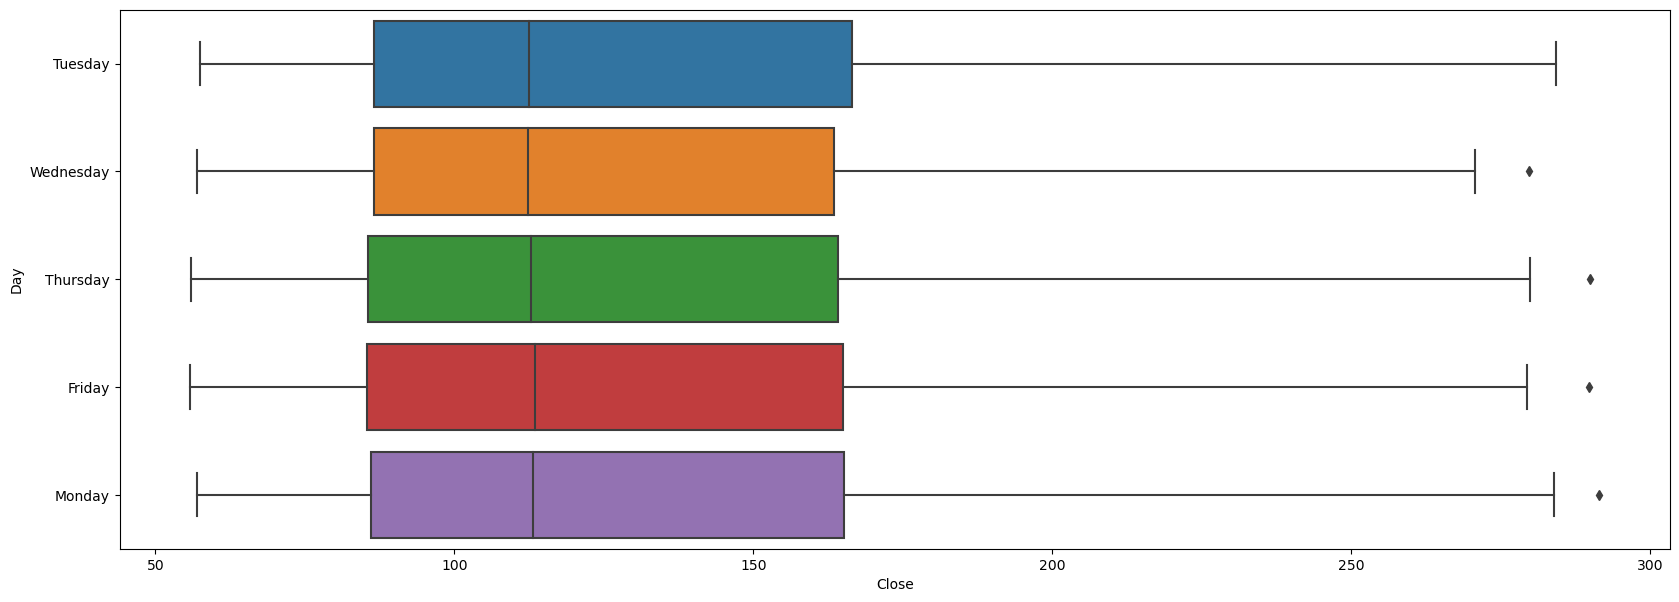

In [20]:
plt.figure(figsize=(20,7))
sns.boxplot(x='Close', y='Day', data=data)

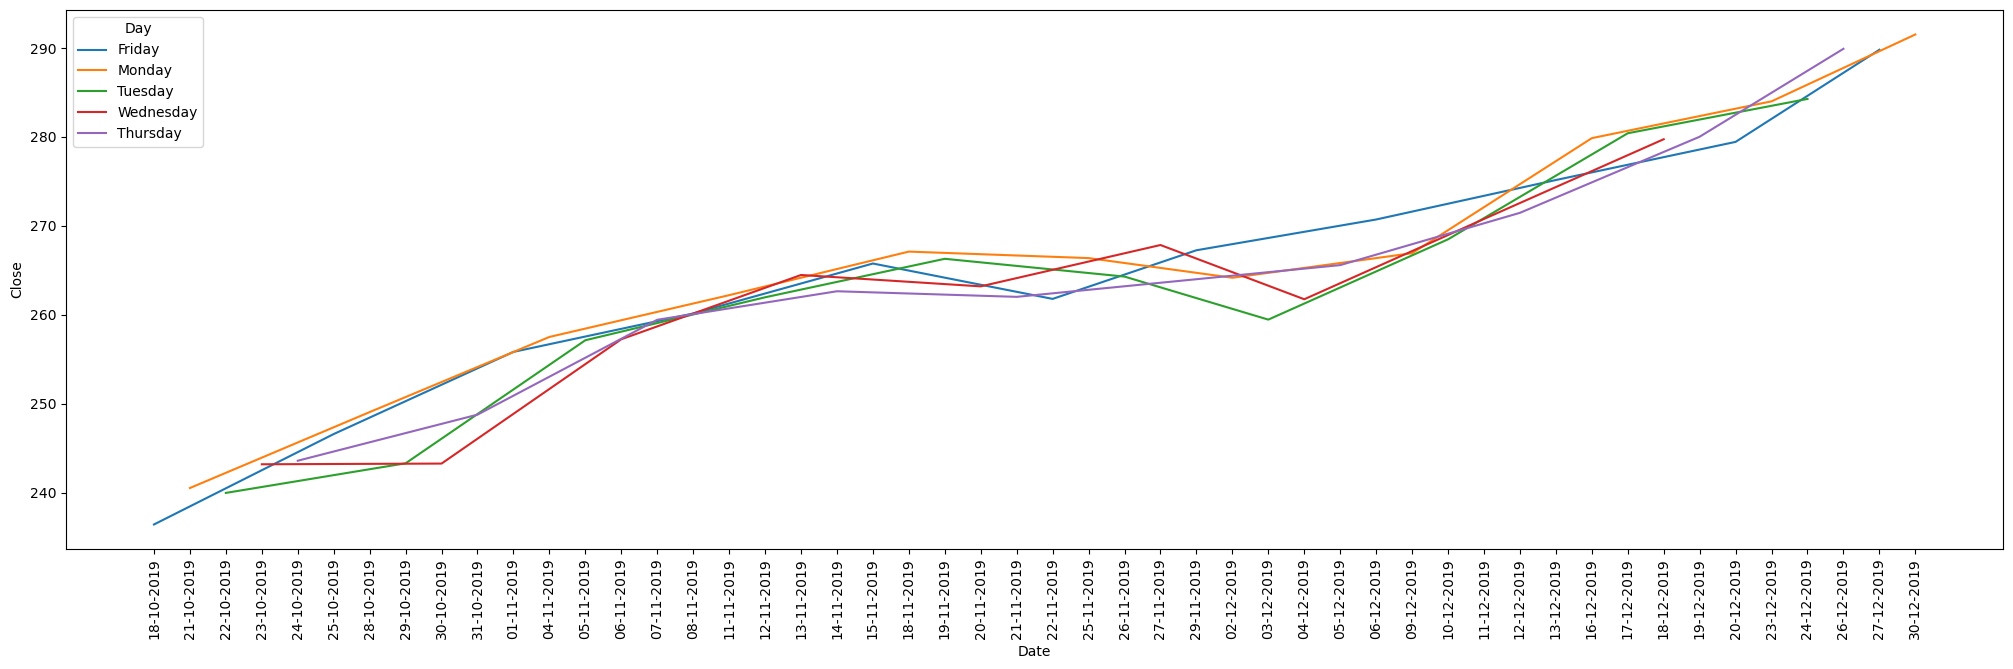

In [46]:
temp_df = data.tail(50)

plt.figure(figsize=(25,7))
sns.lineplot(x='Date', y='Close', hue='Day', data=temp_df)
ax=plt.xticks(rotation = 90)